## Locality Sensitive Hashing (LSH)
### Traditional LSH approach

Sources:

**https://youtu.be/e_SBq3s20M8?si=SB-2KdFKDeaQs01c**

**https://towardsdatascience.com/similarity-search-part-5-locality-sensitive-hashing-lsh-76ae4b388203**

**https://freedium.cfd/https://srivatssan.medium.com/hierarchical-navigable-small-worlds-d44d39d91f4b**

LSH refers to a family of functions (known as LSH families) to hash data points into buckets . This ensures that the data points near each other are located in the same buckets with high probability, while data points far from each other are likely to be in different buckets. This makes it easier to identify observations with various degrees of similarity.

At its core, the final LSH function allows us to segment and hash the same sample several times. And when we find that a pair of vectors has been hashed to the same value at least once , we tag them as candidate pairs — that is, potential matches.

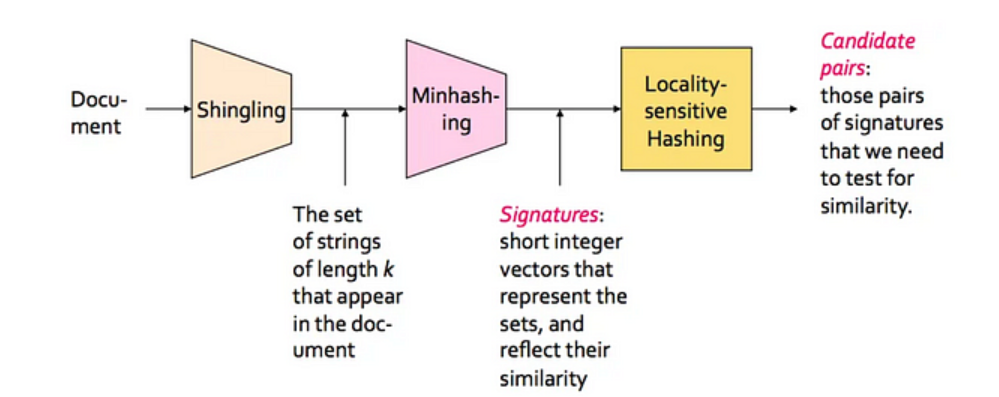

In [45]:
a = "flying fish flew by the space station"
b = "he will not allow your to bring your sticks of dynamite and pet"
c = "he figured a few sticks of dynamite were easier than a fishing"

Step1: Shingling

In [46]:
def shingle(text:str, k:int):
    shingle_set = []
    # print(type(shingle_set))
    for i in range(len(text) - k + 1):
        shingle_set.append(text[i:i+k])
    return set(shingle_set)

In [47]:
k=2
a = shingle(a,k)
b = shingle(b,2)
c = shingle(c,2)
a

{' b',
 ' f',
 ' s',
 ' t',
 'ac',
 'at',
 'by',
 'ce',
 'e ',
 'ew',
 'fi',
 'fl',
 'g ',
 'h ',
 'he',
 'in',
 'io',
 'is',
 'le',
 'ly',
 'ng',
 'on',
 'pa',
 'sh',
 'sp',
 'st',
 'ta',
 'th',
 'ti',
 'w ',
 'y ',
 'yi'}

In [50]:
# Create the vocabulary

vocab = list(a.union(b).union(c))

vocab

['ur',
 'he',
 ' t',
 'ot',
 'si',
 ' e',
 'f ',
 'ed',
 're',
 'er',
 'by',
 'll',
 'et',
 'ie',
 'y ',
 'pa',
 'is',
 'g ',
 'on',
 'ta',
 'te',
 'ic',
 'nd',
 'al',
 'br',
 'hi',
 'ng',
 'dy',
 'o ',
 ' p',
 'ou',
 'il',
 'gu',
 'ce',
 'no',
 'fe',
 'fl',
 'sp',
 'ow',
 ' o',
 'fi',
 ' y',
 'we',
 'wi',
 'ly',
 ' f',
 'ea',
 'am',
 'n ',
 'sh',
 ' b',
 'ks',
 'yi',
 'ti',
 'yn',
 't ',
 'to',
 'an',
 ' a',
 ' d',
 'h ',
 'in',
 'e ',
 'ig',
 'w ',
 'd ',
 'it',
 'le',
 ' w',
 'ck',
 'io',
 'as',
 'lo',
 'ha',
 'of',
 'a ',
 ' s',
 'at',
 'l ',
 'yo',
 'th',
 'mi',
 'ew',
 'ri',
 's ',
 'st',
 ' n',
 'r ',
 'na',
 'ac',
 'pe']

In [57]:
a_1hot = [1 if x in a else 0 for x in vocab]
b_1hot = [1 if x in b else 0 for x in vocab]
c_1hot = [1 if x in c else 0 for x in vocab]

In [58]:
len(a_1hot),len(b_1hot),len(c_1hot),len(vocab), len(a), len(b),len(c)

(91, 91, 91, 91, 32, 54, 52)

In [59]:
a_1hot

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0]

Step2: Minhashing to create Singatures

In [ ]:
# Now, we create signatures using minhashing

In [60]:
hash_ex = list(range(1, len(vocab)+1))

In [62]:
print(hash_ex)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]


In [63]:
from random import shuffle

In [64]:
shuffle(hash_ex)

In [66]:
print(hash_ex)

[88, 75, 47, 23, 16, 56, 48, 44, 28, 18, 22, 36, 9, 90, 11, 34, 45, 5, 55, 37, 29, 15, 51, 17, 3, 61, 62, 31, 8, 7, 13, 49, 4, 59, 30, 84, 26, 41, 24, 69, 82, 6, 42, 12, 77, 89, 76, 65, 53, 43, 64, 73, 81, 57, 63, 35, 40, 1, 87, 52, 86, 74, 2, 54, 58, 78, 38, 80, 50, 21, 68, 20, 67, 39, 85, 14, 10, 83, 33, 70, 72, 60, 25, 91, 19, 79, 46, 32, 71, 27, 66]


In [67]:
for i in range(1, 10):
    print(f"{i} -> {hash_ex.index(i)}")

1 -> 57
2 -> 62
3 -> 24
4 -> 32
5 -> 17
6 -> 41
7 -> 29
8 -> 28
9 -> 12


In [82]:
# Generate the Singature using above Minhash function
for i in range(1, len(vocab)+1):
    idx = hash_ex.index(i) #minhash function
    signature_val = a_1hot[idx] # singled sparse vector
    print(f"{i} -> {idx} -> {signature_val}")
    if signature_val==1:
        print("match!")
        break;
# So, here our signature value is 2

1 -> 57 -> 0
2 -> 62 -> 1
match!


In [75]:
a_1hot[57],a_1hot[62]

(0, 1)

Like that we create our dense signature vector by using multiple minhash functions:
This is how we read it:

Value of 1 in minhash1 function is at 5th index
and at 5th index the value in singled vector is 0, so we ignore it

Now, value 2 in minhash1 function is at 6th index
and at 6th index the value in singled vector is 0, so we
accept it and make our signature value as 2
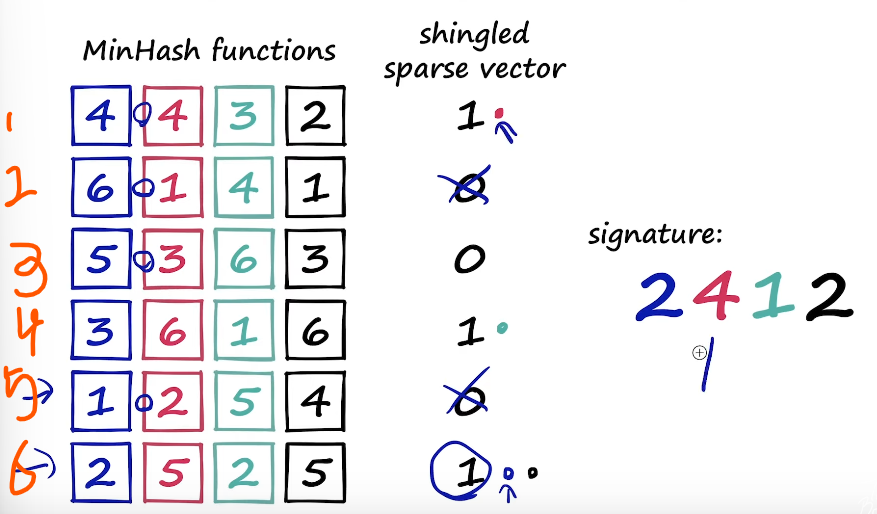

In [83]:
# Now, let's generalise this by crating N Minhash functoions
# <NOTE: in above picture, we have 20 minhash functions>

In [84]:
def create_hash_func(size:int):
    hash_ex = list(range(1, len(vocab)+1))
    shuffle(hash_ex)
    return hash_ex


def build_minhash_func(vocab_size:int, nbits:int):
    hashes=[]
    for _ in range(nbits):
        hashes.append(create_hash_func(vocab_size))
    return hashes

In [183]:
# nbits = 20 -> number of hash functions
minhash_func = build_minhash_func(len(vocab), 20)

In [184]:
len(minhash_func), len(minhash_func[0])
# 20 hash functions with length of 90 of each hash function

(20, 91)

In [185]:
# Now, let's create signatures of a,b,c hot vectors

def create_hash(vector: list):
    signature=[]
    for func in minhash_func:
        for i in range(1, len(vocab)+1):
            idx= func.index(i)
            signature_val = vector[idx]
            if signature_val==1:
                signature.append(idx)
                break;
    return signature

In [186]:
a_signature = create_hash(a_1hot)
b_signature = create_hash(b_1hot)
c_signature = create_hash(c_1hot)

In [187]:
len(a_signature),len(b_signature),len(c_signature) 

(20, 20, 20)

In [188]:
print(a_signature)

[36, 17, 16, 64, 16, 36, 89, 16, 26, 82, 37, 53, 26, 37, 37, 37, 10, 61, 36, 52]


In [189]:
print(b_signature)

[20, 17, 56, 81, 30, 84, 79, 23, 38, 72, 78, 53, 27, 57, 87, 86, 87, 51, 87, 84]


In [190]:
def jaccard(x, y):
    return len(x.intersection(y)) / len(x.union(y))

In [191]:
jaccard(set(a_signature),set(b_signature))

0.07407407407407407

In [192]:
jaccard(a,b)

0.14666666666666667

In [193]:
jaccard(set(c_signature),set(b_signature))

0.2692307692307692

In [194]:
jaccard(c,b)

0.39473684210526316

In [195]:
# Now, comes the LSH function

We'll use bands and rows method:
LSH takes a signature matrix and horizontally divides it into equal b parts called bands each containing r rows.
Instead of plugging the whole signature into a single hash function, the signature is divided by b parts 
and each subsignature is processed independently by a hash function. As a consequence, each of the 
subsignatures falls into separate buckets.

If there is at least one collision between corresponding subvectors of two different signatures, the signatures are considered candidates. As we can see, this condition is more flexible since for considering vectors as candidates they do not need to be absolutely equal. Nevertheless, this increases the number of false positives: a pair of different signatures can have a single corresponding part but in overall be completely different. 
**Depending on the problem, it is always better to optimize parameters b, r and k.**
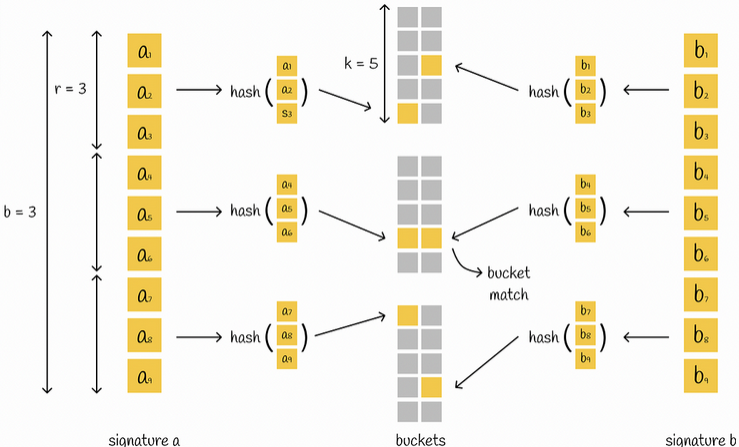

These hash functions in the below image can same or different for different bands
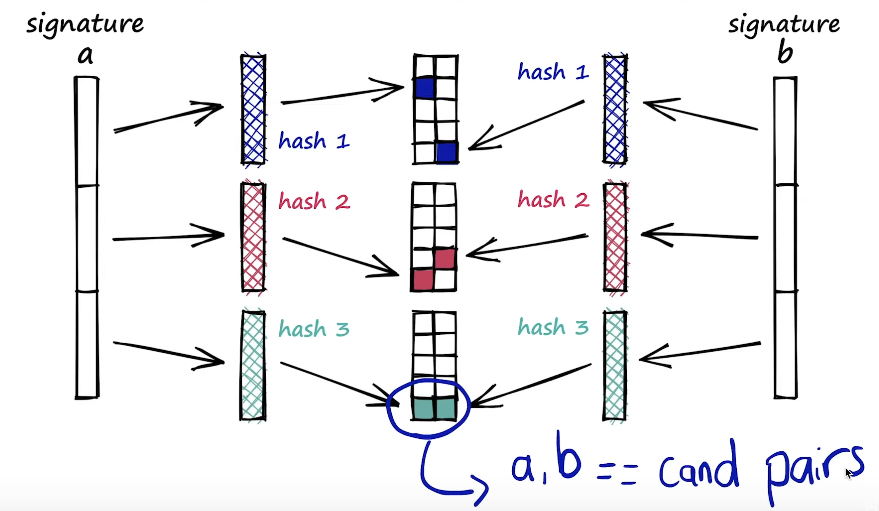



In [199]:
len(a_signature)

20

In [206]:
def split_vector(signature, bands):
    assert len(signature) % bands==0
    rows = int(len(signature)/bands)
    
    subvecs =[]
    for i in range(0,len(signature), rows):
        subvecs.append(signature[i:i+rows])
    return subvecs
    

In [212]:
bands = 5
a_subvector = split_vector(a_signature, bands)

In [213]:
b_subvector = split_vector(b_signature, bands)
c_subvector = split_vector(c_signature, bands)

In [214]:
a_subvector, b_subvector, c_subvector

([[36, 17, 16, 64],
  [16, 36, 89, 16],
  [26, 82, 37, 53],
  [26, 37, 37, 37],
  [10, 61, 36, 52]],
 [[20, 17, 56, 81],
  [30, 84, 79, 23],
  [38, 72, 78, 53],
  [27, 57, 87, 86],
  [87, 51, 87, 84]],
 [[20, 8, 9, 81],
  [16, 42, 73, 73],
  [26, 82, 32, 53],
  [27, 73, 87, 25],
  [87, 51, 87, 84]])

In [215]:
# Now, we need at least one band to match to get the candidate pair:

# Below code is a very simple way to checking the candidate pair

for b_rows,c_rows in zip(b_subvector, c_subvector):
    if b_rows==c_rows:
        print(f"candidate pair: {b_rows} == {c_rows}")
        break

# So here, b_signature and c_signature will be considered as candidate pair

candidate pair: [87, 51, 87, 84] == [87, 51, 87, 84]


In [216]:
for a_rows,b_rows in zip(a_subvector, b_subvector):
    if a_rows==b_rows:
        print(f"candidate pair: {a_rows} == {b_rows}")
        break

In [217]:
for a_rows,c_rows in zip(a_subvector, c_subvector):
    if a_rows==b_rows:
        print(f"candidate pair: {c_rows} == {c_rows}")
        break

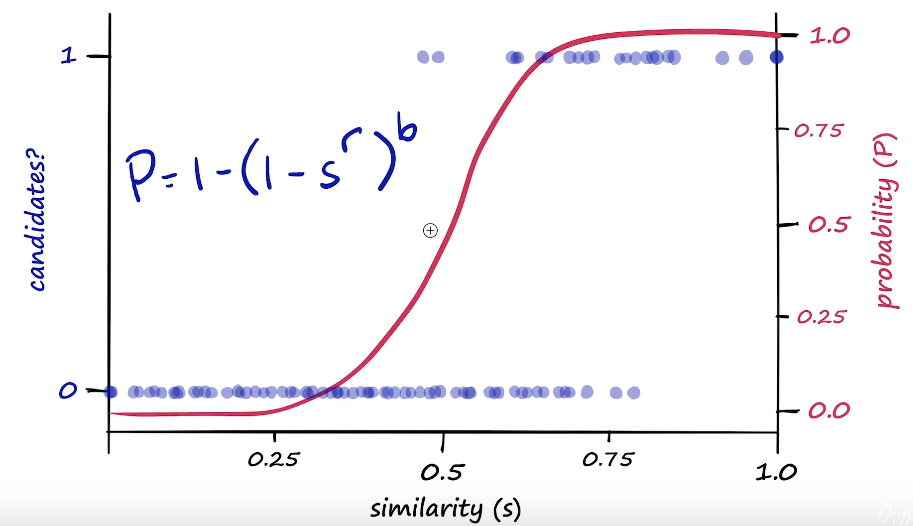

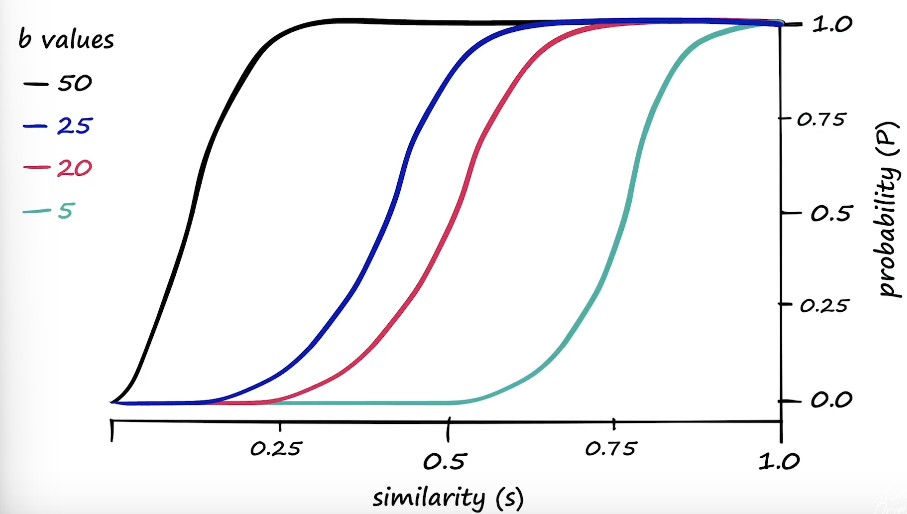

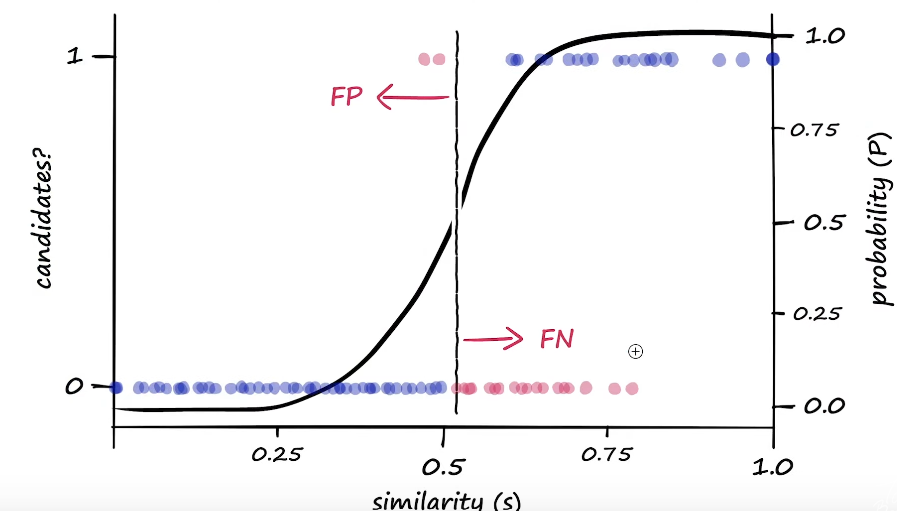